# Twitter Sentiment Analysis

### Importing Packages and Libraries

In [2]:
import tweepy                          # for accessing the Twitter API
from textblob import TextBlob          # for processing textual data
from wordcloud import WordCloud        # for visual representation of textual data
import pandas as pd
import numpy as np
import re                              # for regular expression
import matplotlib.pyplot as plt

### Twitter Api Credentials

In [4]:
df = pd.read_csv(r'C:\Users\windows\Desktop\Projects\Twitter_Sentiment_Analysis\Twitter_Credentials.csv')

In [5]:
api_key = df.api_key[0]
api_key_secret = df.api_key_secret[0]
access_token = df.access_token[0]
access_token_secret = df.access_token_secret[0]

In [6]:
# Create the Authentication Object
auth = tweepy.OAuthHandler(api_key,api_key_secret)

# Set the access token and access token secret
auth.set_access_token(access_token,access_token_secret)

# Creating the Api object while passing authentication information in it
api = tweepy.API(auth)

### Extracting and Analyzing the Data

In [7]:
# Extract last 100 tweets from the Twitter user
posts = api.user_timeline(screen_name="BillGates", count=100, lang='en', tweet_mode="extended")

# Print the recent 5 tweets
print("Show the 5 recent tweets:\n")
for tweet in posts[:5]:
    print(tweet.full_text +'\n')


Show the 5 recent tweets:

I always look forward to meeting Washington’s Teacher of the Year. This year’s recipient, Amy Campbell (@The_MrsCampbell), is a remarkable advocate for her students, and I loved learning about her approach to teaching special ed. https://t.co/kIMB19cK5S

Bill Foege was instrumental in the effort to eradicate smallpox (and is a personal hero of mine). Here he outlines how lessons learned from that campaign can apply to the fight against COVID-19. https://t.co/Ns8WvO9E4h

The world did not do enough to prepare for a pandemic. We can avoid making the same mistake with climate change by:

1. Letting science and innovation lead the way
2. Making sure solutions work for poor countries too
3. Getting started now

https://t.co/p9m1j5QuJ7

Great tips from @CT_Bergstrom about how to find reliable sources of information and test claims you may see about the pandemic in your social media feeds. https://t.co/8RQUZAUICJ

RT @exemplarshealth: In our recent webinar, @doctors

In [9]:
# Create a dataframe to store the tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])       # columns is for giving column name

# Print first 5 rows
df.head()

,Tweets
0,I always look forward to meeting Washington’s ...
1,Bill Foege was instrumental in the effort to e...
2,The world did not do enough to prepare for a p...
3,Great tips from @CT_Bergstrom about how to fin...
4,"RT @exemplarshealth: In our recent webinar, @d..."


**The tweets contain some special characetrs like @,hyperlinks etc.Hence it is necessary to clean the text first before moving ahead.**

### Data Cleaning 

In [10]:
#  Create a function to clean the tweets

def cleantxt(text):
    
    #stop_words = set(stopwords.words('english'))
    #word_tokens = word_tokenize(text)
    
    text = re.sub(r'@[A-Za-z0-9]+', '',text)      # Removing @mentions
    text = re.sub(r'#', '',text)                  # Removing # tags
    text = re.sub(r'RT[\s]+', '',text)            # Removing RT's
    text = re.sub(r'https?:\/\/\S+', '',text)     # Removing hyperlinks
    
    return text

In [11]:
# Clean the tweets

df['Tweets'] = df['Tweets'].apply(cleantxt)

In [12]:
df

,Tweets
0,I always look forward to meeting Washington’s ...
1,Bill Foege was instrumental in the effort to e...
2,The world did not do enough to prepare for a p...
3,Great tips from _Bergstrom about how to find r...
4,": In our recent webinar, called for community..."
...,...
95,Vaccines are a miracle. But how exactly do the...
96,Science is giving us the opportunity to improv...
97,This is an incredible story about the power of...
98,The only way we'll achieve net-zero carbon emi...


### Visualization

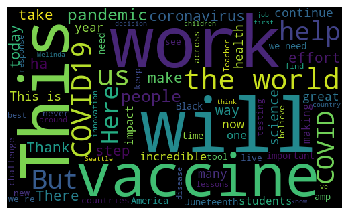

In [13]:
words = ''.join(df['Tweets'])
wordCloud = WordCloud(width=500, height=300, min_font_size=10, max_font_size=110).generate(words)

plt.imshow(wordCloud)
plt.axis("off")
plt.show()

### Subjectivity and Polarity

In [14]:
# Creating a function to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

# Creating a function to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [15]:
# Creating two new columns Subjectivity and Polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

In [16]:
df

,Tweets,Subjectivity,Polarity
0,I always look forward to meeting Washington’s ...,0.707143,0.602381
1,Bill Foege was instrumental in the effort to e...,0.300000,0.000000
2,The world did not do enough to prepare for a p...,0.528472,0.025000
3,Great tips from _Bergstrom about how to find r...,0.408333,0.416667
4,": In our recent webinar, called for community...",0.250000,0.000000
...,...,...,...
95,Vaccines are a miracle. But how exactly do the...,0.416667,0.283333
96,Science is giving us the opportunity to improv...,0.333333,-0.166667
97,This is an incredible story about the power of...,0.500000,0.400000
98,The only way we'll achieve net-zero carbon emi...,1.000000,0.000000


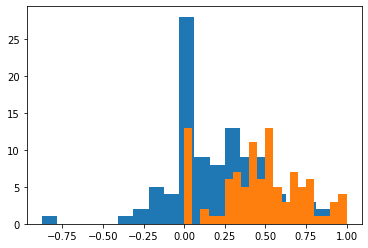

In [17]:
sub = df['Subjectivity']
pol = df['Polarity']
plt.hist(pol, bins=20)
plt.hist(sub, bins=20)
plt.show()

### Analysing the sentiment 

In [18]:
# Creating a function to find whether the tweet is Positive,Negative or Neutral
def getAnalysis(Polarity):
    if Polarity < 0:
        return 'Negative'
    elif Polarity > 0:
        return 'Positive'
    else:
        return 'Neutral'    

In [19]:
df['Analysis'] = df['Polarity'].apply(getAnalysis)

In [20]:
df

,Tweets,Subjectivity,Polarity,Analysis
0,I always look forward to meeting Washington’s ...,0.707143,0.602381,Positive
1,Bill Foege was instrumental in the effort to e...,0.300000,0.000000,Neutral
2,The world did not do enough to prepare for a p...,0.528472,0.025000,Positive
3,Great tips from _Bergstrom about how to find r...,0.408333,0.416667,Positive
4,": In our recent webinar, called for community...",0.250000,0.000000,Neutral
...,...,...,...,...
95,Vaccines are a miracle. But how exactly do the...,0.416667,0.283333,Positive
96,Science is giving us the opportunity to improv...,0.333333,-0.166667,Negative
97,This is an incredible story about the power of...,0.500000,0.400000,Positive
98,The only way we'll achieve net-zero carbon emi...,1.000000,0.000000,Neutral


### Subjectivity vs Polarity

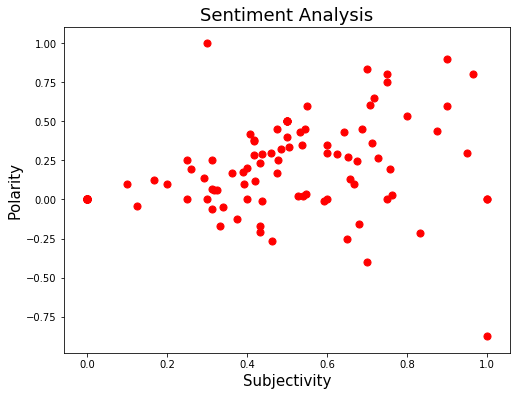

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(df['Subjectivity'],df['Polarity'], s=50, c='red', alpha=1)
plt.title("Sentiment Analysis",fontsize=18)
plt.xlabel("Subjectivity",fontsize=15)
plt.ylabel("Polarity",fontsize=15)
plt.show()

### Plotting the Value Counts

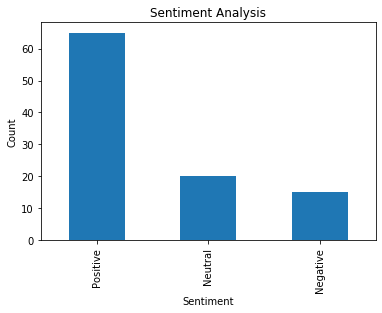

In [22]:
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Count")
df['Analysis'].value_counts().plot(kind='bar')
plt.show()